<a href="https://colab.research.google.com/github/aloy4646/students-grade-classification/blob/main/Neural_Network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Klasifikasi dengan Neural Network

In [1]:
import pandas as pd
import keras,os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from keras.models import Sequential
from keras.layers import Dense, Conv1D, Flatten, MaxPool1D, Dropout
from tensorflow.keras.optimizers import Adam
from keras.utils import to_categorical

## Load Dataset

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
dataset = pd.read_csv('/content/drive/MyDrive/tubesML/student-por-preprocessed.csv')
dataset.head(10)

,higher_yes,school_MS,studytime,Medu,Fedu,reason_reputation,address_U,internet_yes,Mjob_teacher,sex_M,Fjob_teacher,Mjob_health,romantic_yes,G3
0,0.344648,-0.730381,0.083588,1.309206,1.539528,-0.53120,0.659674,-1.814644,-0.352975,-0.832735,4.123292,-0.282389,-0.762908,11
1,0.344648,-0.730381,0.083588,-1.335010,-1.187916,-0.53120,0.659674,0.550223,-0.352975,-0.832735,-0.242151,-0.282389,-0.762908,11
2,0.344648,-0.730381,0.083588,-1.335010,-1.187916,-0.53120,0.659674,0.550223,-0.352975,-0.832735,-0.242151,-0.282389,-0.762908,12
3,0.344648,-0.730381,1.289120,1.309206,-0.278768,-0.53120,0.659674,0.550223,-0.352975,-0.832735,-0.242151,3.535752,1.308754,14
4,0.344648,-0.730381,0.083588,0.427801,0.630380,-0.53120,0.659674,-1.814644,-0.352975,-0.832735,-0.242151,-0.282389,-0.762908,13
5,0.344648,-0.730381,0.083588,1.309206,0.630380,1.87963,0.659674,0.550223,-0.352975,1.199013,-0.242151,-0.282389,-0.762908,13
6,0.344648,-0.730381,0.083588,-0.453605,-0.278768,-0.53120,0.659674,0.550223,-0.352975,1.199013,-0.242151,-0.282389,-0.762908,13
7,0.344648,-0.730381,0.083588,1.309206,1.539528,-0.53120,0.659674,-1.814644,-0.352975,-0.832735,4.123292,-0.282389,-0.762908,13
8,0.344648,-0.730381,0.083588,0.427801,-0.278768,-0.53120,0.659674,0.550223,-0.352975,1.199013,-0.242151,-0.282389,-0.762908,17
9,0.344648,-0.730381,0.083588,0.427801,1.539528,-0.53120,0.659674,0.550223,-0.352975,1.199013,-0.242151,-0.282389,-0.762908,13


In [5]:
X = dataset.drop('G3', axis=1)
y = dataset['G3']

In [6]:
len(np.unique(y))

13

hanya tersisa 13 class yang terdapat pada dataset, namun class tertinggi bernilai 18, sehingga num_classes = 19 (0-18) saat y diubah menjadi categorical

In [7]:
y = tf.keras.utils.to_categorical(y, num_classes=19)

## Membagi data train dan test

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Mengubah shape X agar dapat di training menggunakan CNN

In [9]:
print(np.shape(X_train))

(1081, 13)


In [10]:
X_train = np.array(X_train).reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = np.array(X_test).reshape(X_test.shape[0], X_test.shape[1], 1)

## Membuat model CNN

In [19]:
model = Sequential()

model.add(Conv1D(64, 3, activation='relu', input_shape=(X_train.shape[1], 1)))
model.add(MaxPool1D(2))
model.add(Dropout(0.25))
model.add(Conv1D(128, 3, activation='relu'))
model.add(MaxPool1D(2))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(19, activation='softmax'))

In [20]:
opt = Adam(learning_rate=0.001)
model.compile(optimizer=opt, loss=keras.losses.categorical_crossentropy, metrics=['accuracy'])

In [21]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_4 (Conv1D)           (None, 11, 64)            256       
                                                                 
 max_pooling1d_4 (MaxPooling  (None, 5, 64)            0         
 1D)                                                             
                                                                 
 dropout_8 (Dropout)         (None, 5, 64)             0         
                                                                 
 conv1d_5 (Conv1D)           (None, 3, 128)            24704     
                                                                 
 max_pooling1d_5 (MaxPooling  (None, 1, 128)           0         
 1D)                                                             
                                                                 
 dropout_9 (Dropout)         (None, 1, 128)           

## Training model

In [22]:
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=1000, batch_size=64)

Epoch 1/1000
17/17 [==============================] - 15s 29ms/step - loss: 2.8190 - accuracy: 0.0805 - val_loss: 2.6483 - val_accuracy: 0.0996
Epoch 2/1000
17/17 [==============================] - 0s 6ms/step - loss: 2.6073 - accuracy: 0.1221 - val_loss: 2.5075 - val_accuracy: 0.1402
Epoch 3/1000
17/17 [==============================] - 0s 6ms/step - loss: 2.5008 - accuracy: 0.1388 - val_loss: 2.4441 - val_accuracy: 0.2066
Epoch 4/1000
17/17 [==============================] - 0s 7ms/step - loss: 2.4473 - accuracy: 0.1563 - val_loss: 2.3979 - val_accuracy: 0.1993
Epoch 5/1000
17/17 [==============================] - 0s 6ms/step - loss: 2.3893 - accuracy: 0.1600 - val_loss: 2.3585 - val_accuracy: 0.1771
Epoch 6/1000
17/17 [==============================] - 0s 7ms/step - loss: 2.3271 - accuracy: 0.1859 - val_loss: 2.3040 - val_accuracy: 0.2177
Epoch 7/1000
17/17 [==============================] - 0s 7ms/step - loss: 2.2877 - accuracy: 0.1952 - val_loss: 2.2199 - val_accuracy: 0.2472
Epoc

## Plot hasil training

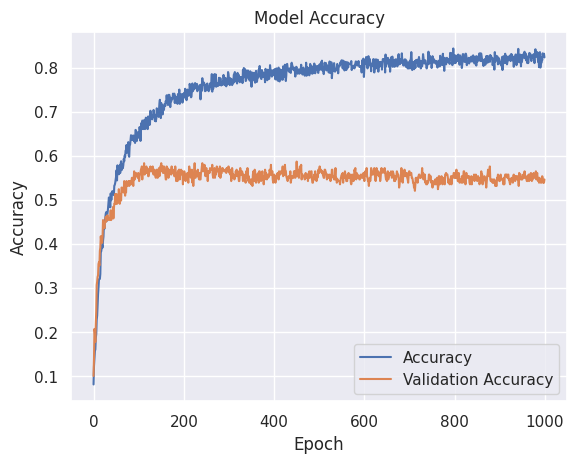

In [23]:
plt.plot(history.history["accuracy"])
plt.plot(history.history['val_accuracy'])
plt.title("Model Accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(["Accuracy","Validation Accuracy"])
plt.show()

## Testing

9/9 [==============================] - 0s 2ms/step


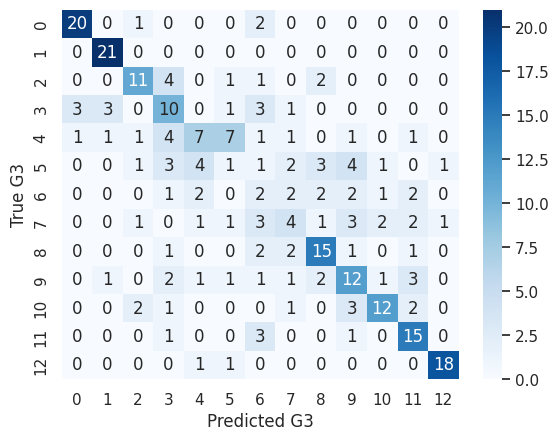

In [24]:
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
confusion_mtx = confusion_matrix(np.argmax(y_test, axis=1), y_pred_classes)

sns.heatmap(confusion_mtx, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted G3')
plt.ylabel('True G3')
plt.show()

In [25]:
accuracy = accuracy_score(np.argmax(y_test, axis=1), y_pred_classes)
precision = precision_score(np.argmax(y_test, axis=1), y_pred_classes, average='macro')
recall = recall_score(np.argmax(y_test, axis=1), y_pred_classes, average='macro')
f1 = f1_score(np.argmax(y_test, axis=1), y_pred_classes, average='macro')

print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 score: {f1:.2f}")

Accuracy: 0.55
Precision: 0.52
Recall: 0.54
F1 score: 0.52


In [26]:
model.save('/content/drive/MyDrive/tubesML/modelNeuralNetwork.h5')